# Q2

## a

The stability condition says that if the loss function is convex and $\rho$-Lipschitz, then the loss on the training set is far from the loss on the "real world" by $ \frac{2\rho^2}{\lambda |S|}$ at most.

## b

### (a)

Using the Cauchy-Schwarz Inequality, we get:

$ |x|  \| w-u \|  \geq  |<x,w-u>| =  | <x,w> - <x,u>| = |(1-y<x,w>)-(1-y<x,u>)|  $

when marking $a = (1-y<x,w>)$ and $b = (1-y<x,u>)$, the last term above is necessariliy $ \geq |max\{0,a\} - max\{0,b\}| $

Explanation - assuming |a-b| represents the distance between a and b, in case both a and b are negative values, the max function will turn to |0-0|, hence 0 is necessariliy smaller than |a-b|. In case one of then is negative and the other is positive, then the max function will turn the negative a or b to zero, and again |a-0| or |b-0| is smaller than |a-b|. In case both are positive, we did not change |a-b| when adding the max term.  

In conclusion, we showed that  $ |max\{0,1-y<x,w>\}-max\{0,1-y<x,u>\}| \leq |x|\|w-u\| $

### (b)

We can conclude that in soft-SVM, the loss on the training set is far from the loss on the "real world" by $ \frac{2 x^2}{\lambda |S|}$ at most.

# Q3

## a

In [2]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sb

%matplotlib inline 
# %matplotlib notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The bias represents how well our model fits the data, or how much predicted values differ from true values. 
The variance represents how well our model can generelize to new data, or how predictions made on the same value vary with different realizations of the model. 
The higher the complexity of the model, the lower the bias is, and the higher the variance is. 
In case of high bias, we should increase the complexity of the model by adding more features (if possible) or increase the order of the model (adding more parameters). We can also relax the regularization term. In case of high variance, we could add more data to the training (if possible) or lower the model complexity by using regularization/inhance the current regularization. 

## b

In [3]:
from IPython.display import Math

Math(r'E[(Y-\hat{f})^2] = E[(f + \epsilon -\hat{f})^2]')
display('add and substract:')
Math('= E[(f + \epsilon -\hat{f} + E(\hat{f}) - E(\hat{f}))^2]'+ 
    '= E[((f - E(\hat{f})) + \epsilon + (E(\hat{f})-\hat{f}))^2]')
display('open a term in the form of (a+b+c)^2:')
Math('= E[(f - E(\hat{f}))^2 + \epsilon^2 + (E(\hat{f})-\hat{f})^2 +2\epsilon(f-E(\hat{f})) + 2\epsilon(E(\hat{f})-\hat{f}) + 2(f-E(\hat{f}))(E(\hat{f})-\hat{f})]'+
    '= E[(f-E(\hat{f}))^2] + E[\epsilon^2] + E[(E(\hat{f})-\hat{f})^2] + 2E[\epsilon(f-E(\hat{f}))] +2E[\epsilon(E(\hat{f})-\hat{f})] + 2E[(f-E(\hat{f}))(E(\hat{f})-\hat{f})]') 
display('since:' )
Math(r'E[(f-E(\hat{f}))^2] = (f-E(\hat{f}))^2')  
Math(r'E[\epsilon] = 0') 
Math(r'E[E(\hat{f})-\hat{f}] = 0')
display('then: ')
Math('= (f-E(\hat{f}))^2 + E[\epsilon^2] + E[(E(\hat{f})-\hat{f})^2]')
display('and since: ')
Math('Var(\epsilon) = E(\epsilon^2) - (E(\epsilon))^2 = \sigma^2')
display('then: ')
Math('= Bias[\hat{f}]^2 + \sigma^2 + Var[\hat{f}]')
display('Q.E.D')



<IPython.core.display.Math object>

'add and substract:'

<IPython.core.display.Math object>

'open a term in the form of (a+b+c)^2:'

<IPython.core.display.Math object>

'since:'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'then: '

<IPython.core.display.Math object>

'and since: '

<IPython.core.display.Math object>

'then: '

<IPython.core.display.Math object>

'Q.E.D'

# Q4

## a

In [ ]:
# The following is written in main.py file as well 

import numpy as np
import pandas as pd
from utils import load_mnist
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Using python's functions
def cv(X,y,model,folds):    
    scores = cross_validate(model, X, y, cv=folds, scoring='accuracy', return_train_score=True)
    return np.mean(1 - scores['train_score']), np.mean(1 - scores['test_score'])

# Using a function we wrote 
# def cv(X,y,model,folds):
#     kf = KFold(n_splits = folds, random_state=1000)
#     mat_train = []
#     mat_val = []
#     for train_index, val_index in kf.split(X):
#         X_train_cv, X_val = X.iloc[train_index], X.iloc[val_index]
#         y_train_cv, y_val = y.iloc[train_index], y.iloc[val_index]
#         model.fit(X_train_cv, y_train_cv)
#         y_pred_train = model.predict(X_train_cv)
#         y_pred_val = model.predict(X_val)
#         train_error = 1-accuracy_score(y_train_cv, y_pred_train)
#         val_error = 1-accuracy_score(y_val, y_pred_val)
#         mat_train.append(train_error)
#         mat_val.append(val_error)
    
#     return np.mean(mat_train), np.mean(mat_val)

## b

**NOTE:** polynomial degree of 10 was almost imposible to fit. after 5 hours we just gave up and answered the question up to polynomial degree of 9.  

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from utils import load_mnist
from sklearn.metrics import accuracy_score
from main import cv

X, y = load_mnist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

folds = 5 # change to 5

kernel_types = ['linear', 'poly', 'rbf']
degree = range(2,10)
gamma = [0.001,0.01,0.1,1,10]

cv_results = dict()

#linear
clf = SVC(kernel = 'linear')
a,b = cv(X_train,y_train,clf,folds)
k_name = 'svm_linear'
clf.fit(X_train, y_train)       
y_pred = clf.predict(X_test)
c = 1-accuracy_score(y_test, y_pred)    
cv_results[k_name] = [a,b,c]

display('lin')

#poly
for d in degree:
    clf = SVC(kernel = 'poly', degree = d)
    a,b = cv(X_train,y_train,clf,folds)
    k_name = 'svm_poly_d' + str(d)
    clf.fit(X_train, y_train)       
    y_pred = clf.predict(X_test)
    c = 1-accuracy_score(y_test, y_pred)   
    cv_results[k_name] = [a,b,c]
    
    display('poly'+str(d))

#rbf
for g in gamma:
    clf = SVC(kernel = 'rbf', gamma = g)
    a,b = cv(X_train,y_train,clf,folds)
    k_name = 'svm_rbf_g' + str(g)
    clf.fit(X_train, y_train)       
    y_pred = clf.predict(X_test)
    c = 1-accuracy_score(y_test, y_pred)   
    cv_results[k_name] = [a,b,c]
    display('rbf'+str(g))
            

lin


'poly2'

'poly3'

'poly4'

'poly5'

'poly6'

'poly7'

'poly8'

'poly9'

'rbf0.001'

'rbf0.01'

'rbf0.1'

'rbf1'

'rbf10'

In [4]:
cv_results #train_cv_error, test_cv_error, test_error

{'svm_linear': [0.0, 0.09047603883465585, 0.09312500000000001],
 'svm_poly_d2': [0.0, 0.04718205100969253, 0.04749999999999999],
 'svm_poly_d3': [0.0, 0.05640755225221783, 0.05249999999999999],
 'svm_poly_d4': [0.0, 0.07421998565061885, 0.07125000000000004],
 'svm_poly_d5': [0.0, 0.09312875000278487, 0.09062499999999996],
 'svm_poly_d6': [0.0, 0.1185994203368953, 0.11312500000000003],
 'svm_poly_d7': [0.0, 0.14828421437893394, 0.130625],
 'svm_poly_d8': [0.0, 0.17328368888884202, 0.15625],
 'svm_poly_d9': [0.000117210404582746,
  0.2025099882295482,
  0.17812499999999998],
 'svm_rbf_g0.001': [0.0, 0.8881249831170503, 0.8875],
 'svm_rbf_g0.01': [0.0, 0.8881249831170503, 0.8875],
 'svm_rbf_g0.1': [0.0, 0.8881249831170503, 0.8875],
 'svm_rbf_g1': [0.0, 0.8881249831170503, 0.8875],
 'svm_rbf_g10': [0.0, 0.8881249831170503, 0.8875]}

In [5]:
import pandas as pd

df = pd.DataFrame.from_dict(cv_results, orient='index',
                            columns = ['train_cv_error', 'test_cv_error', 'test_error'])

In [6]:
df

,train_cv_error,test_cv_error,test_error
svm_linear,0.000000,0.090476,0.093125
svm_poly_d2,0.000000,0.047182,0.047500
svm_poly_d3,0.000000,0.056408,0.052500
svm_poly_d4,0.000000,0.074220,0.071250
svm_poly_d5,0.000000,0.093129,0.090625
svm_poly_d6,0.000000,0.118599,0.113125
svm_poly_d7,0.000000,0.148284,0.130625
svm_poly_d8,0.000000,0.173284,0.156250
svm_poly_d9,0.000117,0.202510,0.178125
svm_rbf_g0.001,0.000000,0.888125,0.887500


In [16]:
df['test_cv_error'].min()
df['test_error'].min()

0.04718205100969253

0.04749999999999999

Looks like the best models are an SVM with a polynomial kernel of 2nd degree, if looking at both the test_cv_error and the test error on the test sample. Even polynomial kernel with 3rd and 4th degree seem to perform better than the linear kernel. Anyways, a radial kernel is not suitable in this case. 

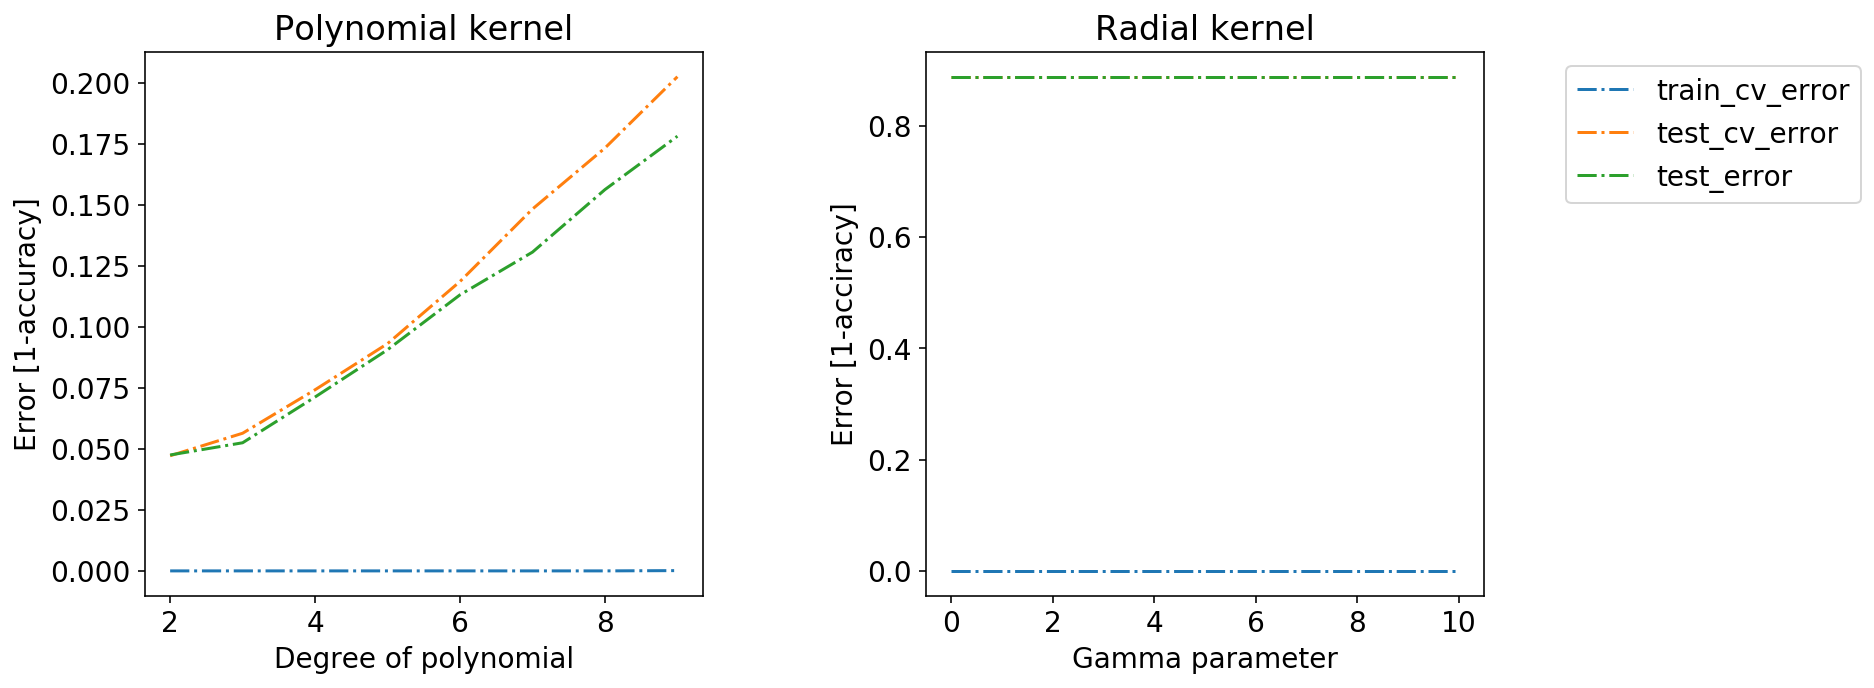

In [17]:
# plot the results 
%config InlineBackend.figure_format = 'retina'
# plt.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

temp = df.iloc[1:9]
ax[0].plot(range(2,10),temp,'-.')
ax[0].set_xlabel('Degree of polynomial')
ax[0].set_ylabel('Error [1-accuracy]')
ax[0].set_title('Polynomial kernel')

temp = df.iloc[9:14]
gamma = [0.001,0.01,0.1,1,10]
ax[1].plot(gamma,temp,'-.')
ax[1].legend(['train_cv_error','test_cv_error','test_error'],loc='upper right',bbox_to_anchor=(1.7, 1))
ax[1].set_xlabel('Gamma parameter')
ax[1].set_ylabel('Error [1-acciracy]')
ax[1].set_title('Radial kernel')

# set parameters
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 14
plt.show();